# Some Fun Visualisations of the Tracked Marine Heatwaves

In [1]:
import xarray as xr
import numpy as np
import dask
from getpass import getuser
from pathlib import Path

import spot_the_blOb.helper as hpc
from spot_the_blOb.plotter import specify_grid, PlotConfig

In [2]:
# Start Dask Cluster
client = hpc.StartLocalCluster(n_workers=32, n_threads=1)

Memory per Worker: 7.86 GB
Hostname is  l10025
Forward Port = l10025:8787
Dashboard Link: localhost:8787/status


In [3]:
# Directories
scratch_dir = Path('/scratch') / getuser()[0] / getuser()

fpath_ckdtree = scratch_dir / 'grid_files' / 'ckdtree' / 'rectgrids'
fpath_tgrid = scratch_dir / 'grid_files' / 'fpath_tgrid.zarr/'
MHW_dataset = scratch_dir / 'mhws' / 'MHWs_tracked_unstruct.zarr'

In [4]:
# Define the Structure of the Unstructured Grid
specify_grid(grid_type='unstructured', fpath_ckdtree=fpath_ckdtree)

In [5]:
# Import Tracked MHW DataSet
blobs_ds = xr.open_zarr(str(MHW_dataset), chunks={})
blobs_ds

<xarray.Dataset> Size: 15GB
Dimensions:       (ID: 337, time: 256, ncells: 14886338, component: 2,
                   sibling_ID: 4)
Coordinates:
  * ID            (ID) int32 1kB 1 2 3 4 5 6 7 8 ... 331 332 333 334 335 336 337
    lat           (ncells) float64 119MB dask.array<chunksize=(14886338,), meta=np.ndarray>
    lon           (ncells) float64 119MB dask.array<chunksize=(14886338,), meta=np.ndarray>
  * time          (time) datetime64[ns] 2kB 2002-04-11T23:59:00 ... 2002-12-2...
Dimensions without coordinates: ncells, component, sibling_ID
Data variables:
    ID_field      (time, ncells) int32 15GB dask.array<chunksize=(4, 232600), meta=np.ndarray>
    area          (time, ID) float32 345kB dask.array<chunksize=(128, 337), meta=np.ndarray>
    centroid      (component, time, ID) float32 690kB dask.array<chunksize=(1, 256, 337), meta=np.ndarray>
    global_ID     (time, ID) int32 345kB dask.array<chunksize=(128, 337), meta=np.ndarray>
    merge_ledger  (time, ID, sibling_ID) int32 1MB dask.array<chunksize=(128, 169, 4), meta=np.ndarray>
    presence      (time, ID) bool 86kB dask.array<chunksize=(256, 337), meta=np.ndarray>
    time_end      (ID) datetime64[ns] 3kB dask.array<chunksize=(337,), meta=np.ndarray>
    time_start    (ID) datetime64[ns] 3kB dask.array<chunksize=(337,), meta=np.ndarray>
Attributes: (12/13)
    N_blobs_final:               336
    N_blobs_prefiltered:         13531
    R_fill:                      32
    T_fill:                      2
    accepted_area_fraction:      0.7818909526485754
    allow_merging:               1
    ...                          ...
    area_threshold (cells):      19318.0
    multi_parent_merges:         16
    nn_partitioning:             1
    overlap_threshold:           0.5
    preprocessed_area_fraction:  0.7812835185427214
    total_merges:                283

In [6]:
# Extract the MHW ID Field
blobs = blobs_ds.ID_field
blobs

<xarray.DataArray 'ID_field' (time: 256, ncells: 14886338)> Size: 15GB
dask.array<open_dataset-ID_field, shape=(256, 14886338), dtype=int32, chunksize=(4, 232600), chunktype=numpy.ndarray>
Coordinates:
    lat      (ncells) float64 119MB dask.array<chunksize=(14886338,), meta=np.ndarray>
    lon      (ncells) float64 119MB dask.array<chunksize=(14886338,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2kB 2002-04-11T23:59:00 ... 2002-12-22T23:...
Dimensions without coordinates: ncells

In [7]:
data = blobs.isel(time=slice(20,26))
data = data.where(data>0)
config = PlotConfig(plot_IDs=True)


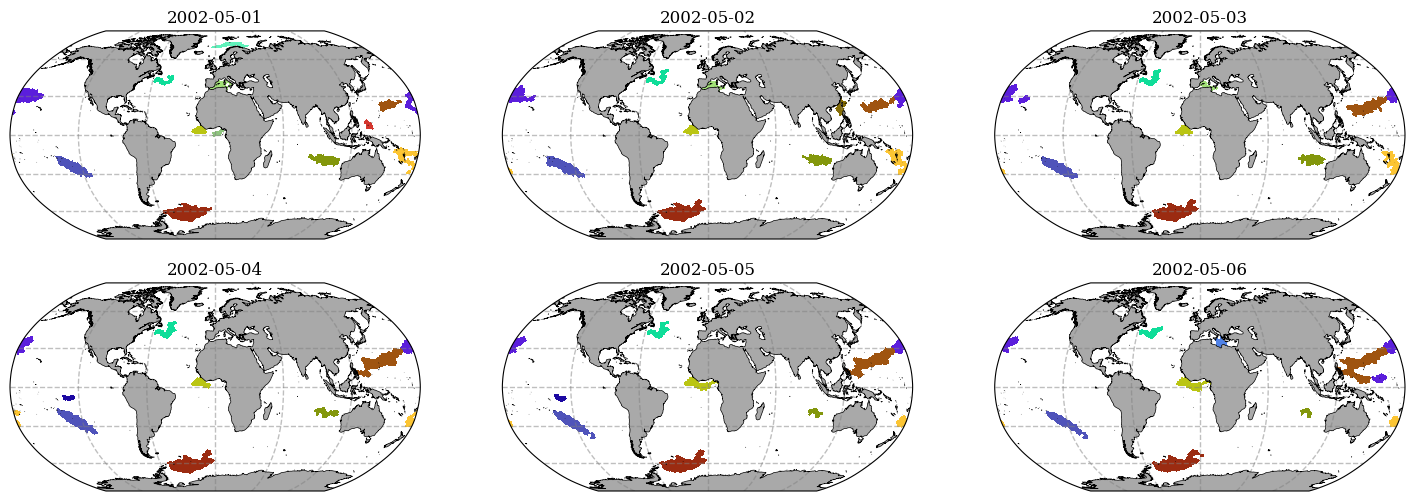

In [8]:
data.xplot.multi_plot(config, col='time', col_wrap=3);

In [9]:
data = blobs
data = data.where(data>0)

plot_dir = Path('/scratch') / getuser()[0] / getuser() / 'mhws' / 'plots'

config = PlotConfig(plot_IDs=True)
data.xplot.animate(config, plot_dir=plot_dir)

/home/b/b382615/opt/anaconda3/lib/python3.10/site-packages/distributed/client.py:3371: UserWarning: Sending large graph of size 28.39 GiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 13.3.0 (conda-forge gcc 13.3.0-1)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1734145030793/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1734145030793/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_173414503079

'/scratch/b/b382615/mhws/plots/movie_ID_field.mp4'

## Make a Nice Blobby Movie
N.B.: Making `dask`-powered movies using `pplot_mov()` cannot be threaded !

In [ ]:
plot_dir = Path('/scratch') / getuser()[0] / getuser() / 'mhws' / 'plots'
time_slice = slice('2024-01-01', '2026-01-01')

In [ ]:
blobs_subset = blobs.sel(time=time_slice)
blobs_subset = blobs_subset.where(blobs_subset > 0)
blobs_subset.plotter.pplot_mov(plot_dir=plot_dir, plot_IDs=True)

In [ ]:
%%HTML
<video width="640" height="480" controls>
    <source src="./plots/movie_ID_field.mp4" type="video/mp4">
    Your browser does not support the video tag.
</video>

## Plot Consecutive Days of Blobby Shapes

In [ ]:
blobbys = blobs.sel(time=slice('2025-01-01', '2025-01-06'))
blobbys = blobbys.where(blobbys>0) 
fig, ax = blobbys.plotter.pplot_col(plot_IDs=True, col_wrap=3, show_colorbar=False)

## Plot some Blobby Shapes (1 Each Month)

In [ ]:
blobs_day1 = blobs.sel(time=slice('2025-01-01', '2025-12-31')).resample(time='MS').first()
blobs_day1 = blobs_day1.where(blobs_day1>0)
fig, ax = blobs_day1.plotter.pplot_col(plot_IDs=True, col_wrap=3, show_colorbar=False)


## Global Blob Frequency

In [ ]:
event_frequency = (blobs > 0).astype(float).mean('time')
fig, ax = event_frequency.plotter.pplot(var_units='MHW Frequency', cmap='hot_r', cperc=[0,96])

## Find & Plot a Few of the Longest Events

In [ ]:
events_duration = blobs_ds.time_end - blobs_ds.time_start
longest_events = events_duration.sortby(events_duration, ascending=False).ID

for ID in longest_events[:10].values:
    print(f"ID: {ID:<6}   Start Day: {blobs_ds.time_start.sel(ID=ID).dt.strftime('%Y-%m-%d').values}  -->  Duration: {events_duration.sel(ID=ID).dt.days.values:<4} days")

In [ ]:
long_blobs = blobs == (longest_events[:9]).chunk({'ID':1})
long_blobs_local_duration = (long_blobs > 0).sum('time')

fig, ax = long_blobs_local_duration.plotter.pplot_col(col='ID', col_wrap=3, var_units='Duration (days)', cmap='hot_r', cperc=[0, 100])

## Time-Series Plot of Events Area

In [ ]:
events_areas = blobs_ds.area * 1.0e5/16.0 # km^2 (very rough estimate, since "area" here is in units of 0.25x0.25 degree grid cells...)

area_mean = events_areas.mean('ID').resample(time='ME').mean()

area_10 = events_areas.reduce(np.nanpercentile, q=10, dim='ID').resample(time='ME').mean()
area_90 = events_areas.reduce(np.nanpercentile, q=90, dim='ID').resample(time='ME').mean()

plt.figure(figsize=(15, 6))
area_mean.plot(label='Mean Area', color='k', lw=2)
plt.fill_between(area_mean.time.values, area_10, area_90, alpha=0.5)
#plt.yscale('log')
plt.ylim([0, 8e7])
plt.ylabel('Rough Event Area [km^2]')


## Hovmüller Plot of MHW Monthly Frequency vs Latitude

In [ ]:
spatial_presence = (blobs > 0).mean(dim='lon').resample(time='ME').mean()

fig, ax = plt.subplots(figsize=(15, 6))
im = spatial_presence.plot(ax=ax, cmap='hot', x='time',
    cbar_kwargs={
        'label': 'MHW Presence Frequency',
        'extend': 'both'})

ax.set_xlabel('Time')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.6)


## Seasonal Cycle of MHW vs Latitude

In [ ]:
spatial_presence_seasonal = (blobs > 0).mean(dim='lon').groupby('time.dayofyear').mean()

fig, ax = plt.subplots(figsize=(15, 6))
im = spatial_presence_seasonal.plot(ax=ax, cmap='hot', x='dayofyear',
    cbar_kwargs={
        'label': 'MHW Seasonal Frequency',
        'extend': 'both'})

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
month_positions = np.cumsum([0] + days_per_month[:-1]) + 15

ax.set_xticks(month_positions)
ax.set_xticklabels(months)
ax.set_xlabel('Month')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.6)
